# Project Scenario:

**You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision?**

### METADATA

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# 1. IMPORTING PACKAGES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
# view the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# 2. CLEANING DATA

In [4]:
# remove the unnamed column
boston_df.drop('Unnamed: 0', axis = 1, inplace = True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
# Redefinig a new column of the CHAS column as a catergorical variable
boston_df['CHASD'] = boston_df['CHAS'].map({0:'Tract Not Bounds River', 1:'Tract Bounds Rivers'})
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHASD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Tract Not Bounds River
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Tract Not Bounds River
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Tract Not Bounds River
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Tract Not Bounds River
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Tract Not Bounds River


In [6]:
# checking for duplicates 
boston_df.duplicated().sum()

0

In [7]:
# descriptive analysis on the data
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
# Information of the data
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  CHASD    506 non-null    object 
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


There is no missing value

In [9]:
# rechecking the Information of the data
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  CHASD    506 non-null    object 
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


# 3. EXPLORING DATA (EXPLORATORY DATA ANALYSIS - EDA)

In [10]:
# reloading the data
display(boston_df.head())
boston_df.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHASD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Tract Not Bounds River
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Tract Not Bounds River
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Tract Not Bounds River
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Tract Not Bounds River
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Tract Not Bounds River


(506, 14)

> **I. WHAT IS THE TREND BETWEEN THE MEDIAN VALUE OF OWNER-OCCUPIED HOMES AND CHARLES RIVER VARIABLE** 

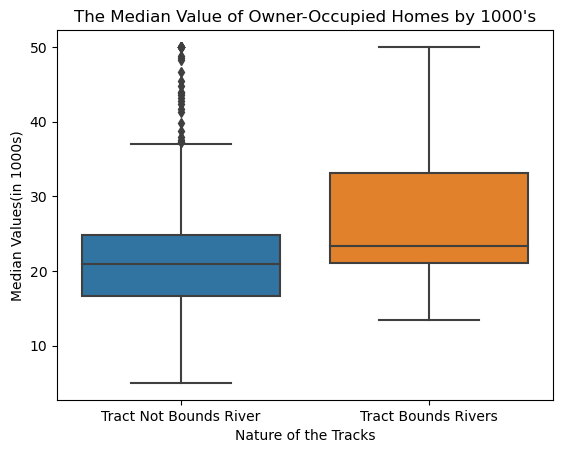

In [31]:
# Visualizing the Median value of owner-occupied homes vs charles river variable
ax = sns.boxplot(data = boston_df, y = 'MEDV', x = 'CHASD')

# naming the x-axis
plt.xlabel('Nature of the Tracks')

# naming the y-axis
plt.ylabel('Median Values(in 1000s)')

# Adding title
plt.title("The Median Value of Owner-Occupied Homes by 1000's")

#show visualiztion
plt.show()

> **II. WHAT IS THE TOTAL COUNT OF THE CHARLES RIVER VARIABLE** 

In [12]:
# Group by the 'CHAS' column and count the number of occurrences of each unique value
boston_df_CHASD = boston_df.groupby('CHASD').size().reset_index(name='CHASD_count')
boston_df_CHASD

,CHASD,CHASD_count
0,Tract Bounds Rivers,35
1,Tract Not Bounds River,471


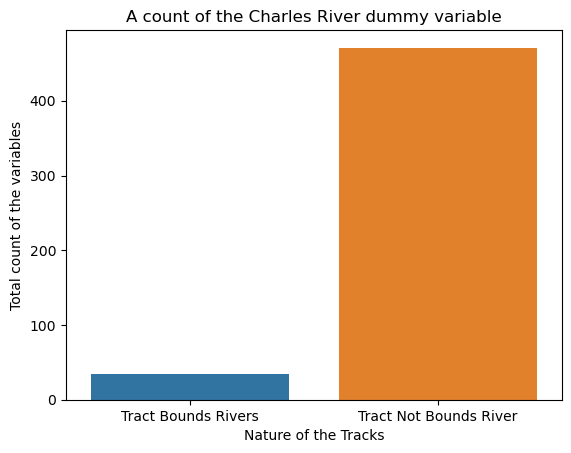

In [13]:
# Visualizing the Charles River Variable

ax = sns.barplot(data = boston_df_CHASD, y = 'CHASD_count', x = 'CHASD', ci = 0)

# naming the x-axis
plt.xlabel('Nature of the Tracks')

# naming the y-axis
plt.ylabel('Total count of the variables')

# Adding title
plt.title('A count of the Charles River dummy variable')

#show visualiztion
plt.show()

> **III. WHAT IS THE TREND BETWEEN THE MEDIAN VALUE OF OWNER-OCCUPIED HOMES AND THE AGE GROUP** 

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

display(boston_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHASD,AGE_GROUP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Tract Not Bounds River,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Tract Not Bounds River,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Tract Not Bounds River,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Tract Not Bounds River,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Tract Not Bounds River,between 35 and 70 years


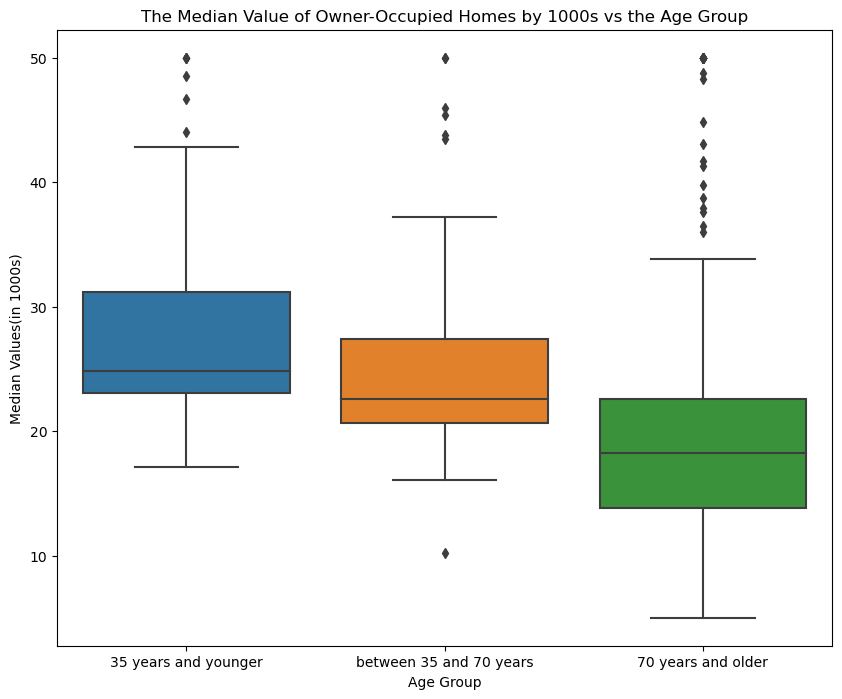

In [15]:
# Configuring the size of the chart
fig, ax = plt.subplots(figsize = (10,8))

# Visualizing the Median value of owner-occupied homes vs Age Group
ax = sns.boxplot(data = boston_df, y = 'MEDV', x = 'AGE_GROUP', order = ['35 years and younger','between 35 and 70 years','70 years and older'])

# naming the x-axis
plt.xlabel('Age Group')

# naming the y-axis
plt.ylabel('Median Values(in 1000s)')

# Adding title
plt.title('The Median Value of Owner-Occupied Homes by 1000s vs the Age Group')

#show visualiztion
plt.show()

> **IV. WHAT IS THE CORRELATION BETWEEN THE Proportion of Non-Retail Business Acres Per Town vs Nitric Oxides Concentration** 

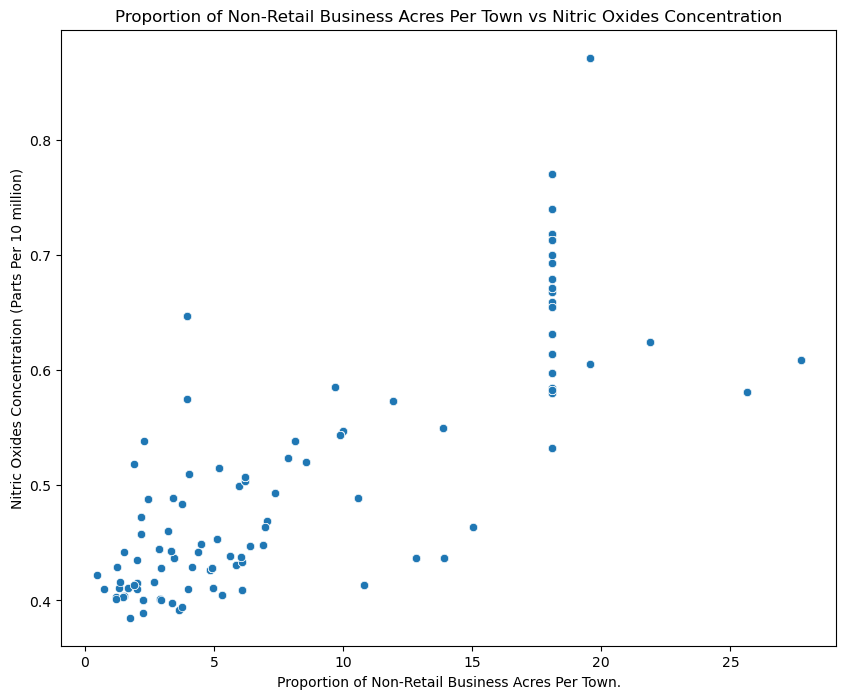

In [16]:
# Configuring the size of the chart
fig, ax = plt.subplots(figsize = (10,8))

# Visualizing the Median value of owner-occupied homes vs Age Group
ax = sns.scatterplot(data = boston_df, y = 'NOX', x = 'INDUS')

# naming the x-axis
plt.xlabel('Proportion of Non-Retail Business Acres Per Town.')

# naming the y-axis
plt.ylabel('Nitric Oxides Concentration (Parts Per 10 million)')

# Adding title
plt.title('Proportion of Non-Retail Business Acres Per Town vs Nitric Oxides Concentration')

#show visualiztion
plt.show()

> **V. WHAT PUPIL TO TEACHER RATIO TREND** 

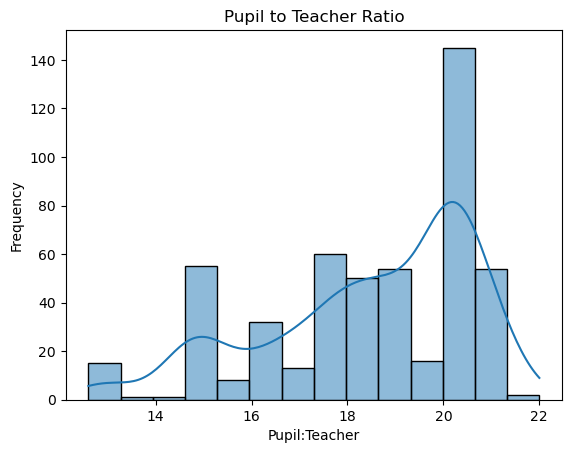

In [17]:
# Visualizing the Median value of owner-occupied homes vs Age Group
ax = sns.histplot(data = boston_df, x = 'PTRATIO', kde=True)

# naming the x-axis
plt.xlabel('Pupil:Teacher')

# naming the y-axis
plt.ylabel('Frequency')

# Adding title
plt.title('Pupil to Teacher Ratio')

#show visualiztion
plt.show()

# 4. STATISTICAL EVALUATION OF DATA

*   Use α = 0.05

> **I. IS THERE A SIGNIFICANT DIFFERENCE IN MEDIAN VALUE OF HOUSES BOUNDED BY THE CHARLES RIVER OR NOT?** 

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the charles river")

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

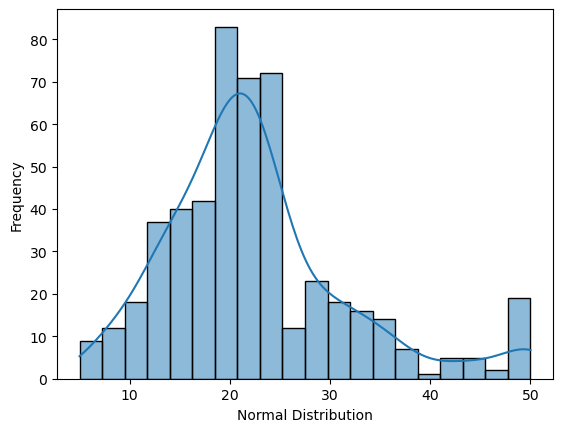

In [32]:
# We can plot the dependent variable with a historgramm (continous variable)

ax = sns.histplot(boston_df['MEDV'],
                  bins=20,
                  kde=True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


In [20]:
# Using the Levene's Test in Python to check test significance (categorical varible)

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

since the p-value is less than 0.05 we can assume unequality of variance

In [21]:
# Carrying out a ttest
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a there is a difference in median value of houses bounded by the charles river

> **II. IS THERE A DIFFERENCE IN MEDIAN VALUE OF HOUSES FOR EACH PROPORTION OF OWNER OCCUPIED UNITS BUILTS PRIOR TO 1940?** 

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three ages means are equal)
*   $H\_1:$ At least one of the means differ


In [28]:
# Test for equality of variance

scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

since the p-value is greater than 0.05, the variance are equal

In [24]:
# separate the three samples into a variable each.

thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy =  boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [25]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

> **III. CAN WE CONCLUDE THAT THERE IS NO RELATIONSHIP BETWEEN NITRIC OXIDE CONCENTRATIONS AND PROPORTION OF NON-RETAIL BUSINESS ACRES PER TOWN?** 

State the hypothesis:

*   $H\_0:$ Nitric Acid Concentration is not correlated with Proportion of non-retail business acres per town
*   $H\_1:$ Nitric Acid Concentration is correlated with Proportion of non-retail business acres per town

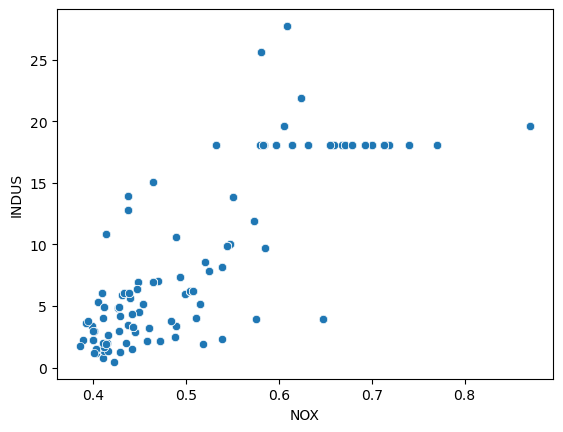

In [26]:
# Representing the continous variable using a scatterplot
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [27]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject  the Null hypothesis and conclude that Nitric Acid Concentration is correlated with Proportion of non-retail business acres per town.

> **IV. WHAT IS THE IMPACT OF AN ADDITIONAL WEIGHTED DISTANCE TO THE FIVE BOSTON EMPLOYMENT CENTRES ON THE MEDIAN VALUE OF OWNER-OCCUPIED HOMES?**

In [29]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        02:36:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we can assume that there is very impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

# CONCLUSIONS:

1. There is a difference in median value of houses bounded by the charles river.

2. Nitric Acid Concentration is correlated with Proportion of non-retail business acres per town.

3. There is a very impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.